# Lab | Intro to Probability

**Objective**

Welcome to this Intro to Probability lab, where we explore decision-making scenarios through the lens of probability and strategic analysis. In the business world, making informed decisions is crucial, especially when faced with uncertainties. This lab focuses on scenarios where probabilistic outcomes play a significant role in shaping strategies and outcomes. Students will engage in exercises that require assessing and choosing optimal paths based on data-driven insights. The goal is to enhance your skills by applying probability concepts to solve real-world problems.

**Challenge 1**

#### Ironhack Airlines 

Often Airlines sell more tickets than they have seats available, this is called overbooking. Consider the following:
- A plane has 450 seats. 
- Based on historical data we conclude that each individual passenger has a 3% chance of missing it's flight. 

If the Ironhack Airlines routinely sells 460 tickets, what is the chance that they have a seats for all passenger?

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


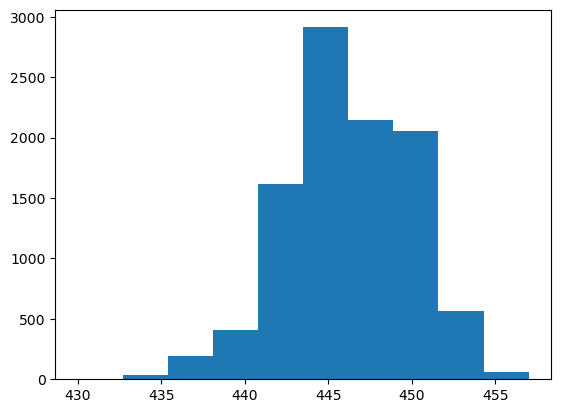

The mean passengers showing up is 446.1791


In [35]:
#H0: Number of Seats >= Number of Passengers - Enough Seats
#H1: Number of Seats < Number of Passengers - Not Enough Seats

number_seats = 450
number_of_tickets = 460
prob_show = (1-0.03)
number_simulations = 10000

number_of_passengers_showing_up = np.random.binomial(number_of_tickets, prob_show, number_simulations)

plt.hist(number_of_passengers_showing_up)
plt.show()
print(f"The mean passengers showing up is {np.mean(number_of_passengers_showing_up)}")

In [37]:
probability_enough_seats = np.mean(number_of_passengers_showing_up <= number_seats)
print(f"Estimated probability of having enough seats: {probability_enough_seats:.4f}")

Estimated probability of having enough seats: 0.8848


**Challenge 2**

#### Ironhack Call Center 

Suppose a customer service representative at a call center is handling customer complaints. Consider the following:
- The probability of successfully resolving a customer complaint on the first attempt is 0.3. 


What is the probability that the representative needs to make at least three attempts before successfully resolving a customer complaint?

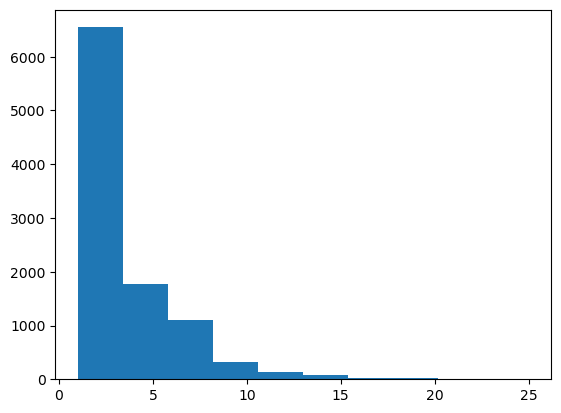

The average number of attempts 3.3287


In [39]:
#H0: Success >= 3
#H1: Success < 3

prob_solved = 0.3
number_simulations = 10000

attempts = np.random.geometric(prob_solved, number_simulations)
plt.hist(attempts)
plt.show()
print(f"The average number of attempts {np.mean(attempts)}")

In [41]:
prob_three_or_more = np.mean(attempts >= 3)

print(f"Estimated probability of at least 3 attempts: {prob_three_or_more:.4f}")

Estimated probability of at least 3 attempts: 0.4933


**Challenge 3**

#### Ironhack Website

Consider a scenario related to Ironhack website traffic. Where:
- our website takes on average 500 visits per hour.
- the website's server is designed to handle up to 550 vists per hour.


What is the probability of the website server being overwhelmed?

In [43]:
#H0: visits <= server_demand
#H1: visits > server_demand

mean_visits = 500
server_limit = 550
num_simulations = 100000  

visits = np.random.poisson(mean_visits, num_simulations)

prob_overwhelmed = np.mean(visits > server_limit)

print(f"Estimated probability of server overload: {prob_overwhelmed:.4f}")



Estimated probability of server overload: 0.0128


What is the probability of being overwhelmed at some point during a day? (consider 24hours)

In [49]:
from scipy.stats import poisson

probability_overwhelmed_hour = poisson.cdf(server_limit, mean_visits)

probability_overwhelmed_day = probability_overwhelmed_hour ** 24

probability_overwhelmed_day_exact = 1-probability_overwhelmed_day

print(f"Estimated probability of server overload during a day: {probability_overwhelmed_day_exact:.4f}")

Estimated probability of server overload during a day: 0.2677


**Challenge 4**

#### Ironhack Helpdesk

Consider a scenario related to the time between arrivals of customers at a service desk.

On average, a customers arrives every 10minutes.

What is the probability that the next customer will arrive within the next 5 minutes?

In [51]:
from scipy.stats import expon

mean_interarrival_time = 10  
time_limit = 5

prob_within_5_min = expon.cdf(time_limit, scale=mean_interarrival_time)

print(f"Probability that the next customer arrives within 5 minutes: {prob_within_5_min:.4f}")

Probability that the next customer arrives within 5 minutes: 0.3935


If there is no customer for 15minutes, employees can that a 5minutes break.

What is the probability an employee taking a break?

In [55]:


mean_interarrival_time = 10  
break_time = 15  

prob_no_customer_15min = 1 - expon.cdf(break_time, scale=mean_interarrival_time)

print(f"Probability that an employee can take a break: {prob_no_customer_15min:.4f}")

Probability that an employee can take a break: 0.2231


**Challenge 5**

The weights of a certain species of birds follow a normal distribution with a mean weight of 150 grams and a standard deviation of 10 grams. 

- If we randomly select a bird, what is the probability that its weight is between 140 and 160 grams?

In [59]:
from scipy.stats import norm

mean = 150
std_weight = 10
max_weight = 160
min_weight = 140

prob_within_range = norm.cdf(max_weight, mean, std_weight) - norm.cdf(min_weight, mean, std_weight)

print(f"Probability that a bird weighs between 140g and 160g: {prob_within_range:.4f}")


Probability that a bird weighs between 140g and 160g: 0.6827


**Challenge 6**

If the lifetime (in hours) of a certain electronic component follows an exponential distribution with a mean lifetime of 50 hours, what is the probability that the component fails within the first 30 hours?

In [61]:
from scipy.stats import expon

mean_interarrival_time = 50  
time_limit = 30

prob_within_30_hrs = expon.cdf(time_limit, scale=mean_interarrival_time)

print(f"Probability that the component fails within first 30 hrs: {prob_within_30_hrs:.4f}")

Probability that the component fails within first 30 hrs: 0.4512
